In [1]:
import numpy as np
import pandas as pd
from groupRuns import groupRun, makeArray, fill_quantile_arrays
import matplotlib.pyplot as plt

In [2]:
gender_weights = [0.64, 0.36]
gender_labels = ['M', 'F']

r_weights = [0.015, 0.1, 0.13, 0.07, 0.01, 0.675]
r_labels = ['AI/NA', 'Asian', 'Black', 'Multi-Racial', 'NH/OPI', 'White']

eth_weights = [0.15, 0.85]
eth_labels = ['Hispanic', 'Non-Hispanic']


In [17]:
#Demonstrate how the number of simulations influences spread 
#simulation_sizes = [10, 100, 1000]
simulation_sizes = [100]

#Different samples sizes we want to try out
samplesLog = [5, 10, 20, 50, 100, 200, 500, 1000, 10000, 100000]
samples = list(range(1,101))
samples5 = list(range(5,101,5))
samples10 = list(range(5,51,5))

quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]

In [4]:
# Calculate G-S indices with weights for gender and race/ethnicity from above using GroupRun
# GroupRun also calculates quantiles, means, and standard deviations from the different GS DI values 
indices_g = []
indices_r = []
indices_eth = []
g_mean = []
r_mean = []
eth_mean = []
for i in range(len(samplesLog)):
    for j in range(len(simulation_sizes)):
        g_quantiles, re_quantiles, eth_quantiles, gst_devs, rest_devs, eth_devs, gmean, remean, ethmean, g_indices, re_indices, eth_indices = groupRun(gender_weights, gender_labels, r_weights, r_labels, eth_weights, eth_labels, simulation_sizes[j], samplesLog[i])
        indices_g.append(g_indices)
        indices_r.append(re_indices)
        indices_eth.append(eth_indices)
        g_mean.append(gmean)
        r_mean.append(remean)
        eth_mean.append(ethmean)
        #print means, sigma, 2sigma, and 3sigma
        print(gmean, gmean+gst_devs, gmean-gst_devs, remean, remean+rest_devs, remean-rest_devs, ethmean, ethmean+eth_devs, ethmean-eth_devs)
        
#-------------------------------------------------------------------------------------------------------------------------        
        #USED FOR BOX PLOT
        #print(samples[i], simulation_sizes[j])
        #print(g_indices, re_indices)
#-------------------------------------------------------------------------------------------------------------------------        


0.37279999999999985 0.5177833093842183 0.22781669061578141 0.43999999999999995 0.6406389792637512 0.23936102073624868 0.20959999999999993 0.4038468532563654 0.015353146743634444
0.4307999999999999 0.5195432250935247 0.3420567749064751 0.46819999999999984 0.6341420380735392 0.30225796192646043 0.22519999999999993 0.35905424909206274 0.09134575090793715
0.4489499999999999 0.5077475127024944 0.3901524872975054 0.50555 0.6104616175645005 0.40063838243549965 0.2432 0.34172796557323204 0.14467203442676796
0.4521279999999999 0.49076571753093073 0.4134902824690691 0.49035999999999996 0.5717738563145119 0.408946143685488 0.24668000000000004 0.3140452610772051 0.17931473892279495
0.4559659999999999 0.4854887512945524 0.4264432487054475 0.5041960000000001 0.5595281894018301 0.44886381059817004 0.259094 0.3097198151934366 0.20846818480656337
0.4594874999999999 0.47787426613083434 0.44110073386916543 0.5063285000000001 0.5451728704125837 0.4674841295874165 0.2547995 0.2855345797095111 0.22406442029

In [18]:
scatterMatch = [x//5 for x in samples10]

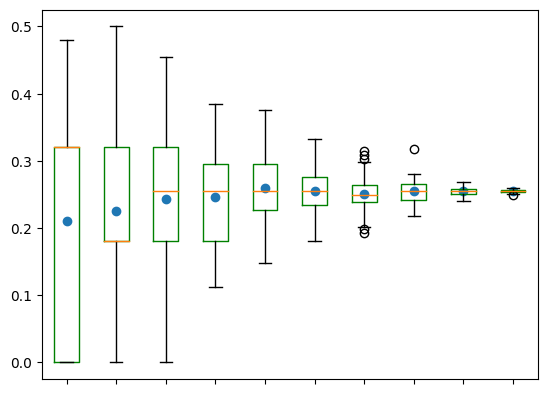

In [20]:
fig, ax = plt.subplots()

bp = ax.boxplot(indices_eth, boxprops=dict(color='green'))
mp = ax.scatter(scatterMatch, eth_mean, marker='o')


ax.set_xticklabels([])

fig.savefig("testFig.jpg")

In [21]:
# To create a figure with axis labels
#fig, ax = plt.subplots()

#bp = ax.boxplot(indices_g, boxprops=dict(color='green'))
#mp = ax.scatter(samples, g_mean, marker='o')

#ax.set_xticklabels([5*i for i in range(1,len(indices_g)+1)])
#ax.set_xticklabels([])

#fig.savefig("testFig.jpg")

In [ ]:
# different sample sizes for 1000 iterations each
for i in range(len(samples)):
    g_quantiles, re_quantiles, gst_devs, rest_devs, gmean, remean = groupRun(gender_weights, gender_labels, re_weights, re_labels, simulation_sizes[2], samples[i])
    print(gmean, gst_devs)

In [ ]:
print('Gender G-S index from population of' + str(sample_size) + 'and' + str(num_simulations) + 'iterations')
print('Racial/Ethnic G-S index from population of' + str(sample_size) + 'and' + str(num_simulations) + 'iterations')